# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from statsmodels.stats.weightstats import ztest
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Question 1: Is the distribution of body temperatures normal?

In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


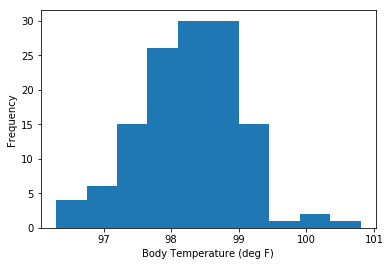

In [6]:
# Plotting a histogram to check the data distribution
_ = plt.hist(df['temperature'])
_ = plt.xlabel('Body Temperature (deg F)')
_ = plt.ylabel('Frequency')

The histogram of observed body temperature indicates that the data may be normally distributed.  In addition, the median and mean of the data appear to be very close.  However, I will perform further testing to prove that the data is normal. 

In [7]:
# Using the mean and standard deviation of the observed data to create 1000 samples following the normal distribution
mean = np.mean(df['temperature'])
std = np.std(df['temperature'], ddof = 1)
samples = np.random.normal(mean, std, size = 1000)

In [8]:
# Defining ecdf function
def ecdf(data):
    '''Computes an ECDF for a one dimensional array of measurements'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [9]:
# Using the observed and theoretical data to get cdf's
x, y = ecdf(df['temperature'])
x_theor, y_theor = ecdf(samples)

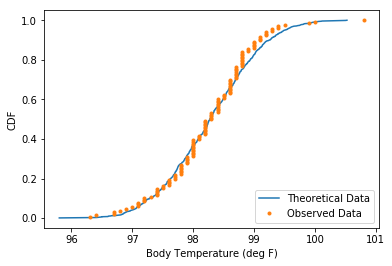

In [10]:
# Plotting the real and theoretical cdf's 
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Body Temperature (deg F)')
_ = plt.ylabel('CDF')
_ = plt.legend(('Theoretical Data', 'Observed Data'), loc = 'lower right')

Since the CDF for the observations closely follow the CDF for the theoretical data sampled from a normal distribution, the distribution of observed body temperature is normal.  Additional tests for a normal distribution are performed below. 

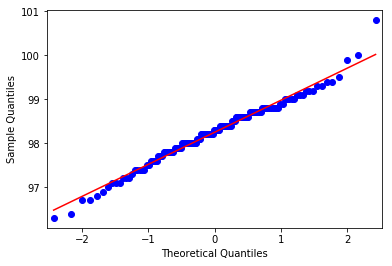

In [11]:
# Plotting a quantile to quantile plot
_ = qqplot(df['temperature'], line='s')

In [12]:
# Performing Shapiro-Wilk test
stat, p_value = stats.shapiro(df['temperature'])
print('The p-value is ' + str(p_value))

The p-value is 0.2331680953502655


In [13]:
# Performing D'Agostino's K2 test
stat, p_value = stats.mstats.normaltest(df['temperature'])
print('The p-value is ' + str(p_value))

The p-value is 0.2587479863488254


In [14]:
# Performing Anderson-Darling test
result = stats.anderson(df['temperature'])
print('The test statistic is ' + str(result.statistic) + ' and the critical values are ' + str(result.critical_values))

The test statistic is 0.5201038826714353 and the critical values are [0.56  0.637 0.765 0.892 1.061]


In [15]:
# Performing Lilliefors test
stat, p_value = lilliefors(df['temperature'])
print('The p-value is ' + str(p_value))

The p-value is 0.2


The quantile to quantile plot shows a strong correlation between the theoretical and sample quantiles.  In the Anderson-Darling test, the resulting test statistic was less than all of the critical values.  The remainder of the statistical tests had generally large (>0.05) p-values.  All of these tests confirm that the data can be treated as a normal distribution. 

## Question 2: Is the sample size large? Are the observations independent? 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [17]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


The sample size (130) is large since it is larger than 30.  The observations seem to be independent as the temperature and heart rate of one person shouldn't affect those of another person. 

## Question 3: Is the true population mean really 98.6 degrees F? 

### Bootstrap Testing

Null Hypothesis: The true mean of the observed body temperature data is equal to 98.6 deg F.   

In [18]:
# Shifting data based on the stated mean body temperature
stated_mean = 98.6 # what normal body temperature was thought to be 
temperature_shifted = df['temperature'] - df['temperature'].mean() + stated_mean   

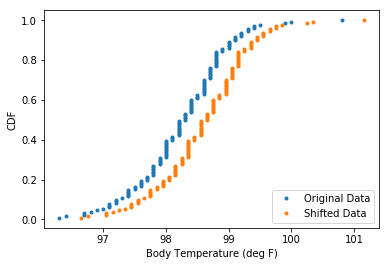

In [19]:
# Checking a CDF of the shifted data vs the original data
x_orig, y_orig = ecdf(df['temperature'])
x_new, y_new = ecdf(temperature_shifted)

_ = plt.plot(x_orig, y_orig, marker = '.', linestyle = 'none')
_ = plt.plot(x_new, y_new, marker = '.', linestyle = 'none')
_ = plt.xlabel('Body Temperature (deg F)')
_ = plt.ylabel('CDF')
_ = plt.legend(('Original Data', 'Shifted Data'), loc = 'lower right')

In [20]:
# Defining functions
def bootstrap_replicate_1d(data, func):
    '''draws a bootstrap replicates'''
    return func(np.random.choice(data, size = len(data)))

def draw_bs_reps(data, func, size = 1):
    '''draws multiple bootstrap replicates'''
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates


In [22]:
# Calculating the mean observed from the original temperature data
obs_mean = np.mean(df['temperature'])

# Generating 10000 bootstrap replicates from the shifted temperature data
bs_replicates = draw_bs_reps(temperature_shifted, np.mean, 10000)

# Calculating the p value as fraction of bootstrap replicates that are less than or equal to the mean from the original data
p_value = np.sum(bs_replicates <= obs_mean) / len(bs_replicates)
print('mean temperature of original data: ' + str(round(obs_mean,2)) + '\np-value: '+ str(p_value))

mean temperature of original data: 98.25
p-value: 0.0


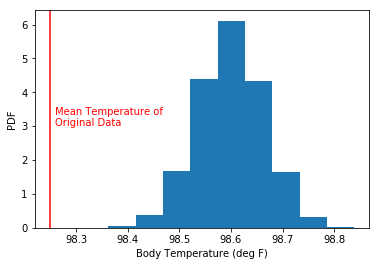

In [23]:
# Plotting PDF of the mean temperature of the shifted data with the mean temperature of the original data
_ = plt.hist(bs_replicates, density = 1)
_ = plt.axvline(x = obs_mean, color = 'r')
_ = plt.text(98.26, 3, 'Mean Temperature of \nOriginal Data', color = 'r')
_ = plt.xlabel('Body Temperature (deg F)')
_ = plt.ylabel('PDF')

After performing 10,000 trials resampling the shifted temperature data and calculating the mean temperature, the p value was found to be 0.  This means that none of the calculated mean temperatures were equal to or less than the mean temperature of the original data (98.25 deg F).  Therefore, the null hypothesis is rejected, which means the true mean of the observed data is not equal to 98.6 deg F. 

### Frequentist Statistical Testing

Since I only have one set of data and a single number to compare it to, I will be performing a one sample test.  In this situation, it would be appropriate to use the t-statistic because although we have a large sample (> 30), we don't know what the standard deviation of the population body temperature is. 

In [24]:
# Calculating t-statistic and p-value
temp_mean = np.mean(df['temperature']) # mean temperature of the observations
temp_std = np.std(df['temperature'], ddof = 1) # standard deviation of the observations

t_stat = (temp_mean - 98.6) / (temp_std / np.sqrt(len(df)))
p_value = stats.t.cdf(x = t_stat, df = len(df) - 1) * 2
print('t-statistic: ' + str(t_stat) + '\np-value: '+ str(p_value))

t-statistic: -5.454823292364079
p-value: 2.4106320415609943e-07


In [25]:
# Checking the t-statistic and p-value with ttest_1samp
t_stat, p_value = stats.ttest_1samp(df['temperature'], 98.6)
print('t-statistic: ' + str(t_stat) + '\np-value: '+ str(p_value))

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


The large negative value for the t statistic indicates that there is quite a bit of difference between the observed body temperature data and the stated body temperature of 98.6 deg F.  The extremely small p-value means that the true mean of the observed body temperature is not equal to 98.6 deg F. 

In [26]:
# Calculating the z-statistic and p-value
z_stat = (temp_mean - 98.6) / (temp_std / np.sqrt(len(df)))
p_value = stats.norm.cdf(z_stat) * 2
print('z-statistic: ' + str(z_stat) + '\np-value: '+ str(p_value))

z-statistic: -5.454823292364079
p-value: 4.90215701411338e-08


In [27]:
# Checking the z-statistic and p-value with ztest
z_stat, p_value = ztest(x1 = df['temperature'], value = 98.6)
print('z-statistic: ' + str(z_stat) + '\np-value: '+ str(p_value))

z-statistic: -5.4548232923645195
p-value: 4.9021570141012155e-08


According to the Central Limit Theorem, if the sample size is large (>30), then the standard deviation of the sample data (observed temperatures) can be used to approximate the z-statistic. Therefore the approximation for the z-statistic is the same as the t-statistic in this case. The p-value is different for the t-statistic and z-statistic as it is generated by two different distributions.  The p-value is, however very small (<0.05) in both cases, thus leading me to reject the null hypothesis that the true mean of the observed body temperature is equal to 98.6 deg F. 

## Question 4:  Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [28]:
# Drawing a random sample with size 10 from the temperature data 
temp_sample = np.random.choice(df['temperature'], size = 10)
temp_sample

array([97.9, 98.4, 98.6, 97.7, 98. , 98.6, 98.3, 99.9, 97. , 97.8])

In [29]:
# Calculating the t-statistic and p-value 
t_stat, p_value = stats.ttest_1samp(temp_sample, 98.6)
print('t-statistic: ' + str(t_stat) + '\np-value: '+ str(p_value))

t-statistic: -1.575451479544909
p-value: 0.14960557192844645


In [30]:
# Calculating the z-statistic and p-value
z_stat, p_value = ztest(x1 = temp_sample, value = 98.6)
print('z-statistic: ' + str(z_stat) + '\np-value: '+ str(p_value))

z-statistic: -1.575451479544909
p-value: 0.1151522697102255


The t-statistic and the z-statistic are both the same while their p-values differ more than in the previous section when the whole dataset was used.  After running these tests on numerous random samples, the p-values vary greatly since the sample size is so small. In most cases the p-values are relatively large(>0.05) and would lead me to fail to reject my null hypothesis that the true mean of the observed body temperature data is equal to 98.6 deg.  But in general, if we have a small sample (n<30) and we don't know the population standard deviation, we should use the t-statistic.  If we have a large sample (n>30) then we may be able to use the z-statistic. 

## Question 5:  At what temperature should we consider someone's temperature to be "abnormal"?

### Bootstrap Approach

In [31]:
# Drawing 10000 random temperature observations
temp_sample = np.random.choice(df['temperature'], 10000, replace = True)

In [32]:
# Getting the 95% confidence interval
conf_lower, conf_upper = np.percentile(temp_sample, [2.5, 97.5])
print('The 95% confidence interval is from ' + str(conf_lower) + ' deg F to ' + str(conf_upper) + ' deg F')

The 95% confidence interval is from 96.7 deg F to 99.5 deg F


According to this method, a person that has a temperature less than 96.7 deg F or greater than 99.5 deg F would be considered abnormal. 

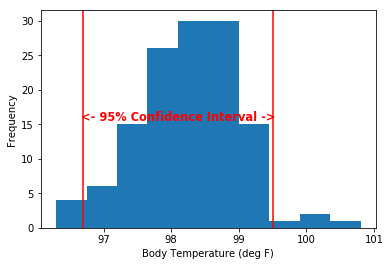

In [33]:
# Plotting histogram and 95 confidence interval
_ = plt.hist(df['temperature'], density = False)
_ = plt.xlabel('Body Temperature (deg F)')
_ = plt.ylabel('Frequency')
_ = plt.axvline(x = conf_lower, color = 'r')
_ = plt.axvline(x = conf_upper, color = 'r')
_ = plt.text(96.67, 15.5, '<- 95% Confidence Interval ->', color = 'r', fontsize = 11.4, weight = 'bold')

### Frequentist Approach

In [34]:
temp_mean = np.mean(df['temperature']) # mean temperature of the observations
temp_std = np.std(df['temperature'], ddof = 1) # standard deviation of the observations

In [35]:
# Calculating the margin of error and 95% confidence interval
marg_error = 1.96 * temp_std  # 1.96 is the critical value for 95% confidence level
conf_lower = temp_mean - marg_error
conf_upper = temp_mean + marg_error
print('The 95% confidence interval is from ' + str(round(conf_lower, 1)) + ' deg F to ' + str(round(conf_upper, 1)) + ' deg F')

The 95% confidence interval is from 96.8 deg F to 99.7 deg F


According to this method, a person that has a temperature less than 96.8 deg F or greater than 99.7 deg F would be considered abnormal. 

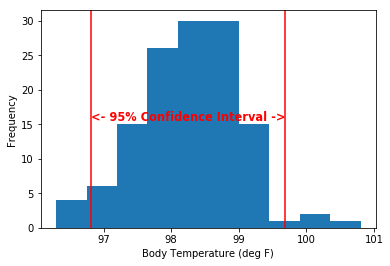

In [36]:
# Plotting histogram and 95 confidence interval
_ = plt.hist(df['temperature'], density = False)
_ = plt.xlabel('Body Temperature (deg F)')
_ = plt.ylabel('Frequency')
_ = plt.axvline(x = conf_lower, color = 'r')
_ = plt.axvline(x = conf_upper, color = 'r')
_ = plt.text(96.81, 15.5, '<- 95% Confidence Interval ->', color = 'r', fontsize = 11.4, weight = 'bold')

## Question 6:  Is there a significant difference between males and females in normal temperature?

### EDA

In [37]:
female = len(df[df['gender'] == 'F'])
male = len(df[df['gender'] == 'M'])
print('There are ' + str(female) + ' observations for females and ' + str(male) + ' observations for males.')

There are 65 observations for females and 65 observations for males.


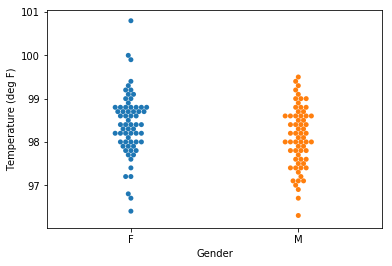

In [38]:
_ = sns.swarmplot(x = 'gender', y = 'temperature', data = df)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature (deg F)')

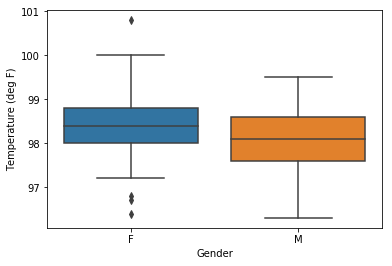

In [39]:
_ = sns.boxplot(x = 'gender', y = 'temperature', data = df)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature (deg F)')

Text(0.5,1,'Males')

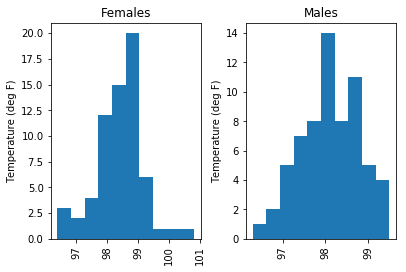

In [40]:
ax1, ax2 = df.hist(column = 'temperature', by = 'gender')
ax1.set_ylabel('Temperature (deg F)')
ax2.set_ylabel('Temperature (deg F)')
ax1.set_title('Females')
ax2.set_title('Males')

In [41]:
# Calculating CDFs for females and males
f_mask = df['gender'] == 'F'  # creating mask for only females
f_temp = df['temperature'][f_mask] # getting only female temperatures
m_mask = df['gender'] == 'M'  # creating mask for only males
m_temp = df['temperature'][m_mask] # getting only male temperatures

x_f, y_f = ecdf(f_temp) 
x_m, y_m = ecdf(m_temp)

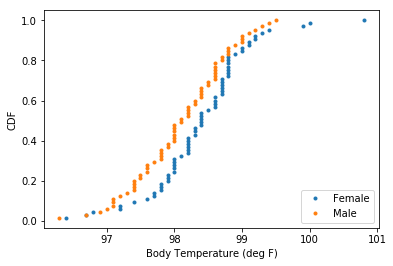

In [42]:
# Plotting the CDFs for females and males
_ = plt.plot(x_f, y_f, marker = '.', linestyle = 'none')
_ = plt.plot(x_m, y_m, marker = '.', linestyle = 'none')
_ = plt.xlabel('Body Temperature (deg F)')
_ = plt.ylabel('CDF')
_ = plt.legend(('Female', 'Male'), loc = 'lower right')

There are an equal number of body temperature observations (65) for males and females. In general, body temperature varies more in females and females have a higher mean body temperature. 

### Testing

As I have two sets of data, I will perform a hypothesis test using permutation.  My test function will be the difference in mean body temperature (female minus male). 

Null Hypothesis:  There is no significant difference in normal temperature between males and females.

In [43]:
# Defining functions

def mean_diff(data1, data2): 
    """calculates the differences in the means of two data sets"""
    return np.mean(data1) - np.mean(data2)

def permutation_sample(data1, data2):
    """generates a permutation sample from two data sets"""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample1 = permuted_data[:len(data1)]
    perm_sample2 = permuted_data[len(data1):]
    return perm_sample1, perm_sample2

def draw_perm_reps(data1, data2, func, size = 1): 
    """generates multiple permutation replicates"""
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample1, perm_sample2 = permutation_sample(data1, data2)
        perm_replicates[i] = func(perm_sample1, perm_sample2)
    return perm_replicates

In [44]:
# Splitting up data
f_mask = df['gender'] == 'F'  # creating mask for only females
f_temp = np.array(df['temperature'][f_mask]) # getting only female temperatures
m_mask = df['gender'] == 'M'  # creating mask for only males
m_temp = np.array(df['temperature'][m_mask]) # getting only male temperatures

# Calculating the difference in mean temp between females and males
obs_diff = np.mean(f_temp) - np.mean(m_temp) 

# Generating 10000 permutation replicates of the difference in mean temperature
perm_replicates = draw_perm_reps(f_temp, m_temp, mean_diff, 10000)

In [45]:
# Calculating the p value as fraction of permutation replicates that are more than or equal to the difference in mean from the observed data
p_value = np.sum(perm_replicates >= obs_diff) / len(perm_replicates)
print('difference in mean temperature of original data (female minus male): ' + str(round(obs_diff, 2)) + '\np-value: '+ str(p_value))

difference in mean temperature of original data (female minus male): 0.29
p-value: 0.0134


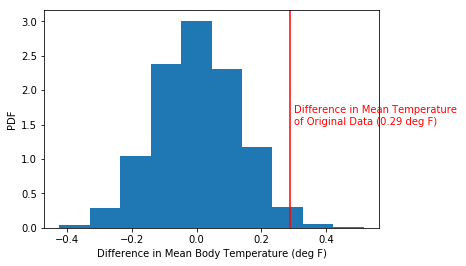

In [46]:
# Plotting PDF of the difference in mean temperature from the permuted data with the difference in mean temperature from the observed data
_ = plt.hist(perm_replicates, density = 1)
_ = plt.axvline(x = obs_diff, color = 'r')
_ = plt.text(0.3, 1.5, 'Difference in Mean Temperature \nof Original Data (0.29 deg F)', color = 'r')
_ = plt.xlabel('Difference in Mean Body Temperature (deg F)')
_ = plt.ylabel('PDF')

The p value was found to be 0.0134 which is small (<0.05).  This means that there were very few calculated differences in mean temperature (female minus male) that were equal to or greater than the difference in mean temperature of the original data (0.29 deg F).  Therefore, the null hypothesis is rejected, which means that there could be a significant difference in normal temperature between males and females.  

### Additional Tests

I will also perform a two sample t test and z test. 

In [47]:
# Calculating the t-statistic and p-value 
t_stat, p_value = stats.ttest_ind(f_temp, m_temp)
print('t-statistic: ' + str(t_stat) + '\np-value: '+ str(p_value))

t-statistic: 2.2854345381656103
p-value: 0.02393188312239561


In [48]:
# Calculating the z-statistic and p-value
z_stat, p_value = ztest(x1 = f_temp, x2 = m_temp)
print('z-statistic: ' + str(z_stat) + '\np-value: '+ str(p_value))

z-statistic: 2.2854345381656103
p-value: 0.02228736076065755


Both the t-statistic and z-statistic are generally large, indicating that there is a difference in male and female body temperature.  The p-values for both of these tests are small (<0.05) so I would reject the null hypothesis that there is no significant difference in body temperature between males and females. 